Install the necessary libraries:

In [1]:
!pip install datasets pandas



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.4 MB/s eta 0:00:00


Import the libraries:

In [2]:
from datasets import load_dataset
import pandas as pd


In [32]:
# Load the 'mpingale/mental-health-chat-dataset'
mental_health_chat = load_dataset("mpingale/mental-health-chat-dataset")


In [33]:
# Load the 'Kiran2004/MentalHealthConversations'
mental_health_conversations = load_dataset("Kiran2004/MentalHealthConversations")


In [34]:
# Load the 'nbertagnolli/counsel-chat'
counsel_chat = load_dataset("nbertagnolli/counsel-chat")


Repo card metadata block was not found. Setting CardData to empty.


In [35]:
import pandas as pd

csv_file_path = "2. Conversations - AnnoMI-full.csv"
csv_data = pd.read_csv(csv_file_path, delimiter=';', encoding='utf-8')

In [36]:
# For 'mpingale/mental-health-chat-dataset'
mental_health_chat = mental_health_chat.rename_column('questionText', 'input') \
                                       .rename_column('answerText', 'output')

# For 'Kiran2004/MentalHealthConversations'
mental_health_conversations = mental_health_conversations.rename_column('Questions', 'input') \
                                                         .rename_column('Answers', 'output')


# Filter out rows where interlocutor is 'client' and 'therapist'
client_data = csv_data[csv_data['interlocutor'] == 'client']
therapist_data = csv_data[csv_data['interlocutor'] == 'therapist']

# Rename the columns to 'input' and 'output'
client_data = client_data.rename(columns={'utterance_text': 'input'})
therapist_data = therapist_data.rename(columns={'utterance_text': 'output'})

# Combine client and therapist data
combined_data = pd.concat([client_data[['input']], therapist_data[['output']]], axis=1)


In [37]:
# Combine client and therapist data
combined_data = pd.concat([client_data[['input']], therapist_data[['output']]], axis=1)

# Convert Hugging Face datasets to pandas DataFrames
mental_health_chat_df = pd.DataFrame(mental_health_chat['train']) # Access the 'train' split, which contains the data.
mental_health_conversations_df = pd.DataFrame(mental_health_conversations['train']) # Access the 'train' split, which contains the data.

# Append all datasets
final_combined_df = pd.concat([mental_health_chat_df[['input', 'output']],
                               mental_health_conversations_df[['input', 'output']],
                               combined_data], ignore_index=True)


final_combined_df.head()

,input,output
0,I have so many issues to address. I have a his...,It is very common for people to have multiple ...
1,I have so many issues to address. I have a his...,"I've never heard of someone having ""too many i..."
2,I have so many issues to address. I have a his...,Absolutely not. I strongly recommending worki...
3,I have so many issues to address. I have a his...,Let me start by saying there are never too man...
4,I have so many issues to address. I have a his...,I just want to acknowledge you for the courage...


Initial shape: (19929, 2)
Non-null input values: 13296
Non-null output values: 13505
Shape after dropping NAs: (6874, 2)
Non-null input values after dropping NAs: 6874
Non-null output values after dropping NAs: 6874
Shape after dropping duplicates: (4096, 2)
Non-null input values after dropping duplicates: 4096
Non-null output values after dropping duplicates: 4096
Shape after dropping empty strings: (4096, 2)
Non-null input values after dropping empty strings: 4096
Non-null output values after dropping empty strings: 4096
Shape after removing extra white spaces: (4096, 2)
Non-null input values after removing whitespaces: 4096
Non-null output values after removing whitespaces: 4096
Cleaned DataFrame Shape: (4096, 2)
Non-null input values after cleaning: 4096
Non-null output values after cleaning: 4096


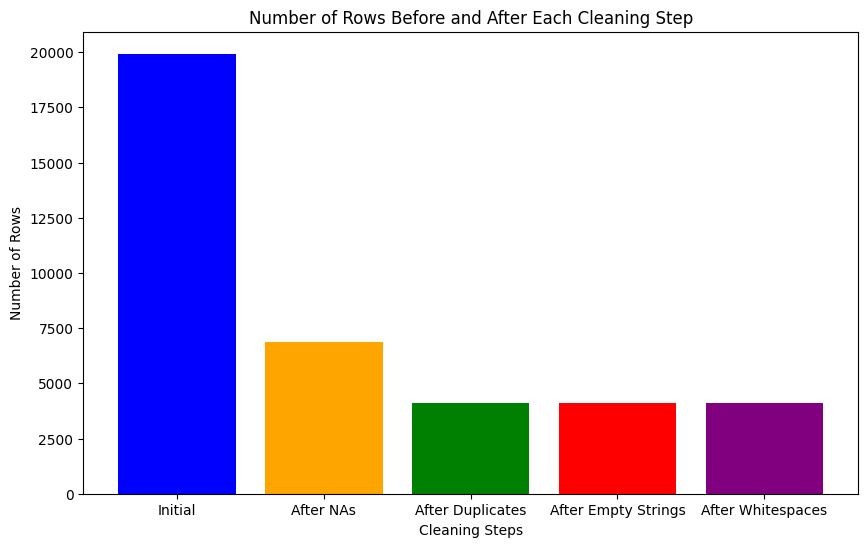

Cleaned DataFrame Shape: (4096, 2)
Cleaned DataFrame Head:
                                               input  \
0  I have so many issues to address. I have a his...   
1  I have so many issues to address. I have a his...   
2  I have so many issues to address. I have a his...   
3  I have so many issues to address. I have a his...   
4  I have so many issues to address. I have a his...   

                                              output  
0  It is very common for people to have multiple ...  
1  I've never heard of someone having "too many i...  
2  Absolutely not. I strongly recommending workin...  
3  Let me start by saying there are never too man...  
4  I just want to acknowledge you for the courage...  


In [38]:
import matplotlib.pyplot as plt

# Data Cleaning function with added bar chart visualization for each step
def clean_dataframe_with_chart(df):
    # Before cleaning
    initial_shape = df.shape
    print(f"Initial shape: {initial_shape}")
    print(f"Non-null input values: {df['input'].notnull().sum()}")
    print(f"Non-null output values: {df['output'].notnull().sum()}")

    # 1. Drop rows where either 'input' or 'output' is null
    df.dropna(subset=['input', 'output'], inplace=True)
    shape_after_na = df.shape
    print(f"Shape after dropping NAs: {shape_after_na}")
    print(f"Non-null input values after dropping NAs: {df['input'].notnull().sum()}")
    print(f"Non-null output values after dropping NAs: {df['output'].notnull().sum()}")

    # 2. Remove exact duplicates
    df.drop_duplicates(inplace=True)
    shape_after_duplicates = df.shape
    print(f"Shape after dropping duplicates: {shape_after_duplicates}")
    print(f"Non-null input values after dropping duplicates: {df['input'].notnull().sum()}")
    print(f"Non-null output values after dropping duplicates: {df['output'].notnull().sum()}")

    # 3. Remove rows where 'input' or 'output' are empty strings
    df = df[(df['input'] != '') & (df['output'] != '')]
    shape_after_empty_strings = df.shape
    print(f"Shape after dropping empty strings: {shape_after_empty_strings}")
    print(f"Non-null input values after dropping empty strings: {df['input'].notnull().sum()}")
    print(f"Non-null output values after dropping empty strings: {df['output'].notnull().sum()}")

    # 4. Remove extra white spaces
    df['input'] = df['input'].str.strip().replace(r'\s+', ' ', regex=True)
    df['output'] = df['output'].str.strip().replace(r'\s+', ' ', regex=True)
    shape_after_whitespaces = df.shape
    print(f"Shape after removing extra white spaces: {shape_after_whitespaces}")
    print(f"Non-null input values after removing whitespaces: {df['input'].notnull().sum()}")
    print(f"Non-null output values after removing whitespaces: {df['output'].notnull().sum()}")

    # 5. Reset index for the cleaned DataFrame
    df.reset_index(drop=True, inplace=True)

    # After cleaning
    final_shape = df.shape
    print(f"Cleaned DataFrame Shape: {final_shape}")
    print(f"Non-null input values after cleaning: {df['input'].notnull().sum()}")
    print(f"Non-null output values after cleaning: {df['output'].notnull().sum()}")

    # Plotting the comparison
    steps = ['Initial', 'After NAs', 'After Duplicates', 'After Empty Strings', 'After Whitespaces']
    shapes = [initial_shape[0], shape_after_na[0], shape_after_duplicates[0], shape_after_empty_strings[0], shape_after_whitespaces[0]]

    plt.figure(figsize=(10, 6))
    plt.bar(steps, shapes, color=['blue', 'orange', 'green', 'red', 'purple'])
    plt.xlabel('Cleaning Steps')
    plt.ylabel('Number of Rows')
    plt.title('Number of Rows Before and After Each Cleaning Step')
    plt.show()

    return df

# Apply the cleaning function with chart
final_combined_df = clean_dataframe_with_chart(final_combined_df)

# Output the cleaned DataFrame shape
print("Cleaned DataFrame Shape:", final_combined_df.shape)
print("Cleaned DataFrame Head:")
print(final_combined_df.head())


In [39]:
# Data Cleaning
def clean_dataframe(df):

    print("Initial shape:", df.shape)
    # 1. Drop rows where either 'input' or 'output' is null
    df.dropna(subset=['input', 'output'], inplace=True)
    print("Shape after dropping NAs:", df.shape)

    # 2. Remove exact duplicates
    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates:", df.shape)

    # 3. Remove rows where 'input' or 'output' are empty strings
    df = df[(df['input'] != '') & (df['output'] != '')]
    print("Shape after dropping empty strings:", df.shape)

    # 4. Remove extra white spaces
    df['input'] = df['input'].str.strip().replace(r'\s+', ' ', regex=True)
    df['output'] = df['output'].str.strip().replace(r'\s+', ' ', regex=True)
    print("Shape after removing extra white spaces:", df.shape)

    # 5. Reset index for the cleaned DataFrame
    df.reset_index(drop=True, inplace=True)


    return df

final_combined_df = clean_dataframe(final_combined_df)
print("Cleaned DataFrame Shape:", final_combined_df.shape)
print("Cleaned DataFrame Head:")
print(final_combined_df.head())

Initial shape: (4096, 2)
Shape after dropping NAs: (4096, 2)
Shape after dropping duplicates: (3379, 2)
Shape after dropping empty strings: (3379, 2)
Shape after removing extra white spaces: (3379, 2)
Cleaned DataFrame Shape: (3379, 2)
Cleaned DataFrame Head:
                                               input  \
0  I have so many issues to address. I have a his...   
1  I have so many issues to address. I have a his...   
2  I have so many issues to address. I have a his...   
3  I have so many issues to address. I have a his...   
4  I have so many issues to address. I have a his...   

                                              output  
0  It is very common for people to have multiple ...  
1  I've never heard of someone having "too many i...  
2  Absolutely not. I strongly recommending workin...  
3  Let me start by saying there are never too man...  
4  I just want to acknowledge you for the courage...  


Initial shape: (3379, 2)
Shape after dropping NAs: (3379, 2)
Shape after dropping duplicates: (3379, 2)
Shape after dropping empty strings: (3379, 2)
Shape after removing extra white spaces: (3379, 2)


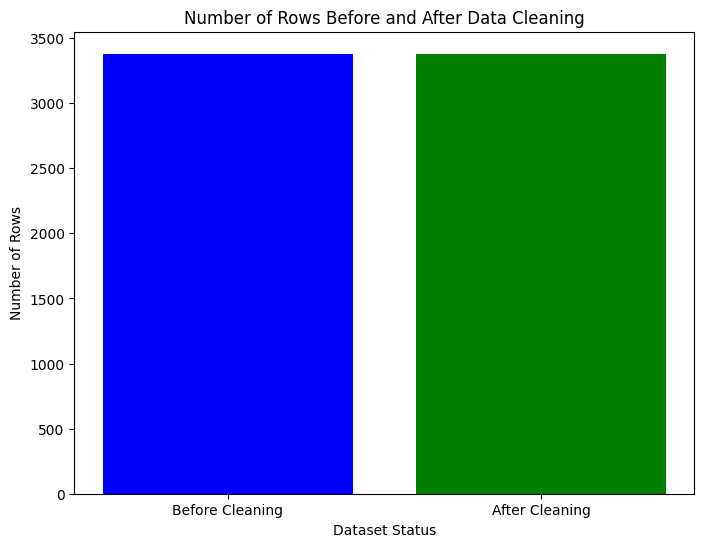

In [40]:
import matplotlib.pyplot as plt

# Before cleaning
before_cleaning_shape = final_combined_df.shape

# Clean the data
cleaned_df = clean_dataframe(final_combined_df)

# After cleaning
after_cleaning_shape = cleaned_df.shape

# Plotting the comparison
labels = ['Before Cleaning', 'After Cleaning']
values = [before_cleaning_shape[0], after_cleaning_shape[0]]  # Number of rows (Shape[0])

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green'])
plt.xlabel('Dataset Status')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Before and After Data Cleaning')
plt.show()
